# Data Visualizations from Combined Sets

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df_ten = pd.read_pickle(r'C:\\\\\\\\\\\\\\\\Users\\\\\\\\\\\\\\\\eppin\\\\\\\\\\\\\\\\12-2020 Instacart Basket Analysis\\\\\\\\\\\\\\\\02 Data\\\\\\\\\\\\\\\\Original Data\\\\\\\\\\\\\\\\df_11.pkl')

check to see how the data frame looks before moving forward with it

Specifically is the prices column here?

In [3]:
df_ten.head()

,order_id,user_id,Order_Day_Of_Week,order_hour_of_day,days_since_prior_order,Unnamed: 0,product_name,department_id,prices,_merge,...,Frequency_label,First Name,Surname,Gender,STATE,Age,date_joined,Number_of_Dependants,Marital_Status,income
0,2539329,1,2,8,NaN,195,Soda,7,9.0,both,...,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,3,7,15.0,195,Soda,7,9.0,both,...,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,12,21.0,195,Soda,7,9.0,both,...,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,7,29.0,195,Soda,7,9.0,both,...,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,4,15,28.0,195,Soda,7,9.0,both,...,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [4]:
df_ten.shape

(32404859, 28)

<AxesSubplot:>

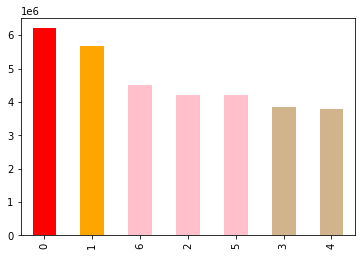

In [5]:
#Bar Chart
df_ten['Order_Day_Of_Week'].value_counts().plot.bar(color=['red','orange','pink','pink','pink','tan','tan'])

<AxesSubplot:xlabel='Age', ylabel='income'>

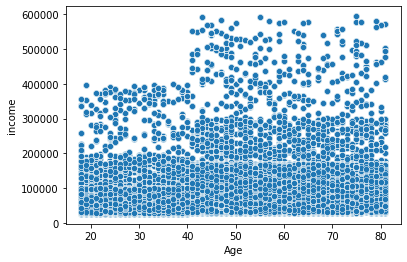

In [6]:
#Scatterplot 
sns.scatterplot(x = 'Age', y = 'income',data = df_ten)

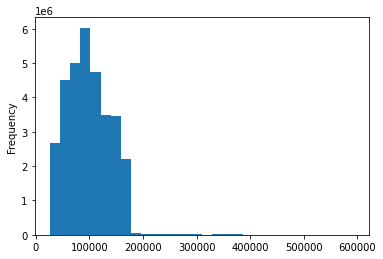

In [7]:
#histogram - What income group are our most frequent customers?
hist = df_ten['income'].sort_index().plot.hist(bins = 30)

# Sampling the Dataset

In [8]:
#seed is the random repeatable pattern, we will take 70% of the df_nine set with this code, 70/30 or 80/20 is a good ratio
np.random.seed(4)
# (len(df_nine)) tells the random pattern to enter as many arguments as are in our data frame
dev = np.random.rand(len(df_ten)) <= 0.7

In [9]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [10]:
df_ten.head()

,order_id,user_id,Order_Day_Of_Week,order_hour_of_day,days_since_prior_order,Unnamed: 0,product_name,department_id,prices,_merge,...,Frequency_label,First Name,Surname,Gender,STATE,Age,date_joined,Number_of_Dependants,Marital_Status,income
0,2539329,1,2,8,NaN,195,Soda,7,9.0,both,...,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,3,7,15.0,195,Soda,7,9.0,both,...,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,12,21.0,195,Soda,7,9.0,both,...,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,7,29.0,195,Soda,7,9.0,both,...,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,4,15,28.0,195,Soda,7,9.0,both,...,Non_frequent_customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [11]:
big = df_ten[dev]

In [12]:
#takes all true boolean values from the above code in the dev df ^^
small = df_ten[~dev]

In [13]:
len(big) + len(small)

32404859

In [14]:
#len(df_ten)

In [15]:
#create a new data frame using only the following columns 
#df_ten_2 = small [['Order_Day_Of_Week', 'product_id']]

In [16]:
#let this run when I have time to let the computer sit
#sns.lineplot(data = df_ten_2, x = 'Order_Day_Of_Week',y = 'product_id'

# Stakeholder Questions

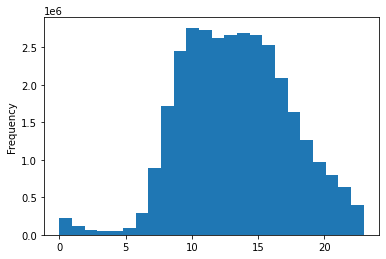

In [22]:
#3 create a histogram for hours of the day
hist_3 = df_ten['order_hour_of_day'].plot.hist(bins = 24)

1. As expected there is a drop in order numbers starting between 22:00 and ending at 7:00.  
2. Unexpected is there there is a peak of ordering during the workday, suggesting that people are doing most of their orders during the work day 

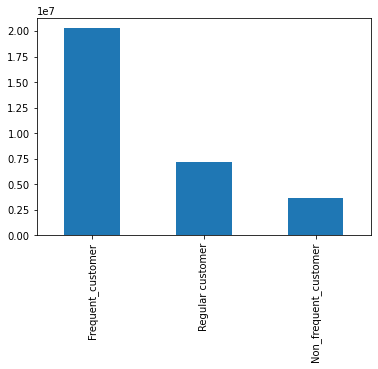

In [52]:
#4 create a bar chart with the frequent order flag 
plot = df_ten['Frequency_label'].value_counts().plot.bar()

1. As expected frequent customers make up a huge amount of the orders 
2. There could be benefits to trying to convert non_frequent customers into regular customers by offering some type of rewards card

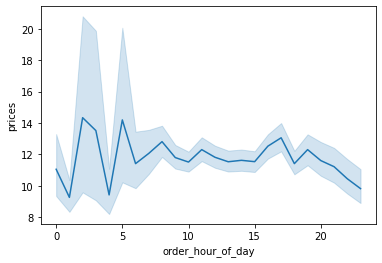

In [55]:
#5 difference in spending depending on the hour of day
#order hour of day and prices.sum() line chart
line = sns.lineplot(data = big, x = 'order_hour_of_day',y = 'prices')

People are much more likely to splurge on purchases at odd hours of the night (0-5)

In [29]:
#group by user id, age, then do prices sum (make a scatter plot from df_11)
sums_customer =  df_ten.groupby(['user_id','Age'],as_index=False).prices.sum()
print(sums_customer)


        user_id  Age  prices
0             1   31   375.7
1             2   68  1465.6
2             3   33   721.4
3             4   31   147.7
4             5   75   340.0
...         ...  ...     ...
206204   206205   38   285.1
206205   206206   25  2179.3
206206   206207   76  1630.9
206207   206208   64  5664.2
206208   206209   74   910.6

[206209 rows x 3 columns]


In [37]:
sums_customer = sums_customer.astype({"prices": int}, errors='raise') 

In [38]:
sums_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206209 entries, 0 to 206208
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  206209 non-null  int64
 1   Age      206209 non-null  int64
 2   prices   206209 non-null  int32
dtypes: int32(1), int64(2)
memory usage: 5.5 MB


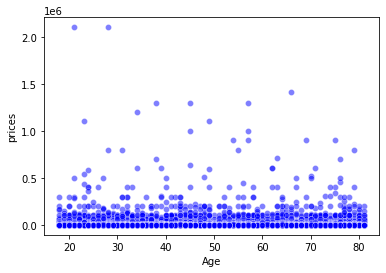

In [45]:
#5 difference in spending depending on the hour of day
#order hour of day and prices.sum() line chart
scatter = sns.scatterplot(x = 'Age', y = 'prices',data = sums_customer, color="blue", alpha=0.5)

In [50]:
scatter.figure.savefig(r'C:\\\\\\\\\\\\\\\\Users\\\\\\\\\\\\\\\\eppin\\\\\\\\\\\\\\\\12-2020 Instacart Basket Analysis\\\\\\\\\\\\\\\\04 Analysis\\\\\\\\\\\\\\\\Figures\\\\\\\\\\\\\\\\scatter.png')

In [56]:
line.figure.savefig(r'C:\\\\\\\\\\\\\\\\Users\\\\\\\\\\\\\\\\eppin\\\\\\\\\\\\\\\\12-2020 Instacart Basket Analysis\\\\\\\\\\\\\\\\04 Analysis\\\\\\\\\\\\\\\\Figures\\\\\\\\\\\\\\\\line.png')

In [53]:
hist_3.figure.savefig(r'C:\\\\\\\\\\\\\\\\Users\\\\\\\\\\\\\\\\eppin\\\\\\\\\\\\\\\\12-2020 Instacart Basket Analysis\\\\\\\\\\\\\\\\04 Analysis\\\\\\\\\\\\\\\\Figures\\\\\\\\\\\\\\\\hist_3.png')

In [54]:
plot.figure.savefig(r'C:\\\\\\\\\\\\\\\\Users\\\\\\\\\\\\\\\\eppin\\\\\\\\\\\\\\\\12-2020 Instacart Basket Analysis\\\\\\\\\\\\\\\\04 Analysis\\\\\\\\\\\\\\\\Figures\\\\\\\\\\\\\\\\plot.png')

In [ ]:
#Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents: